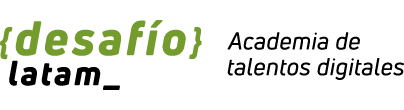

#<center><font color = 'green'>Solución Desafío - Análisis estadístico con Python</font></center>

La OMS estima que cada año se producen 12 millones de muertes en todo el mundo debido a enfermedades cardíacas, producidas en su gran mayoría por enfermedades cardiovasculares. El pronóstico temprano de las enfermedades cardiovasculares puede ayudar en la toma de decisiones sobre cambios en el estilo de vida en pacientes de alto riesgo y reducir las complicaciones.

La base de datos **cardio.csv** contiene mediciones realizadas a pacientes hace 10 años, entre los cuales se encuentran

*  Sex: M - F
* Age: edad
* Education: codificada, considerando que un valor más alto corresponde a un mayor nivel educativo.
* currentSmoker: si el paciente es o no fumador actual
* cigsPerDay: el número de cigarrillos que la persona fumaba en promedio en un día.
* BPMeds: si el paciente estaba tomando medicamentos para la presión arterial (0: No, 1: Sí)
* prevalenStroke: si el paciente había tenido un accidente cerebrovascular previamente (0: No, 1: Sí)
* prevalentHyp:: si el paciente era hipertenso o no (0: No, 1: Sí)
* diabetes: si el paciente tenía diabetes o no (0: No, 1: Sí)
* totChol: nivel de colesterol total
* sysBP: presión arterial sistólica
* diaBP_BMI: presión arterial diastólica
* BMI: Índice de masa corporal
* heartRate: : ritmo cardíaco
* glucose: nivel de glucosa
* TenYearCHD: se indica si el paciente sufrió o no una enfermedad coronaria en los últimos 10 años.(0: No, 1: Sí)

A partir de estos datos, buscaremos realizar algunas descripciones  predictivos.

1.  Carga los datos y explóralos. Elimina los datos nulos o incorrectos


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('cardio.csv')
df.head()

sex  age  education currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0   M   39        4.0            No         0.0     0.0                0   
1   F   46        2.0            No         0.0     0.0                0   
2   M   48        1.0           Yes        20.0     0.0                0   
3   F   61        3.0           Yes        30.0     0.0                0   
4   F   46        3.0           Yes        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB


In [82]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3656 non-null   object 
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   object 
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 485.6+ KB


Hemos dejado así solo los datos no nulos.

2. Escoge tres variables cuantitativas y realiza un análisis descriptivo de ellas, utilizando indicadores y gráficos. ¿Cuaĺ presenta mayor dispersión?


In [83]:
columnas = ['age', 'sysBP', 'BMI'] #puede variar dependiendo de cada estudiante
estadisticas = df[columnas].describe()
print(estadisticas)

               age        sysBP          BMI
count  3656.000000  3656.000000  3656.000000
mean     49.557440   132.368025    25.784185
std       8.561133    22.092444     4.065913
min      32.000000    83.500000    15.540000
25%      42.000000   117.000000    23.080000
50%      49.000000   128.000000    25.380000
75%      56.000000   144.000000    28.040000
max      70.000000   295.000000    56.800000


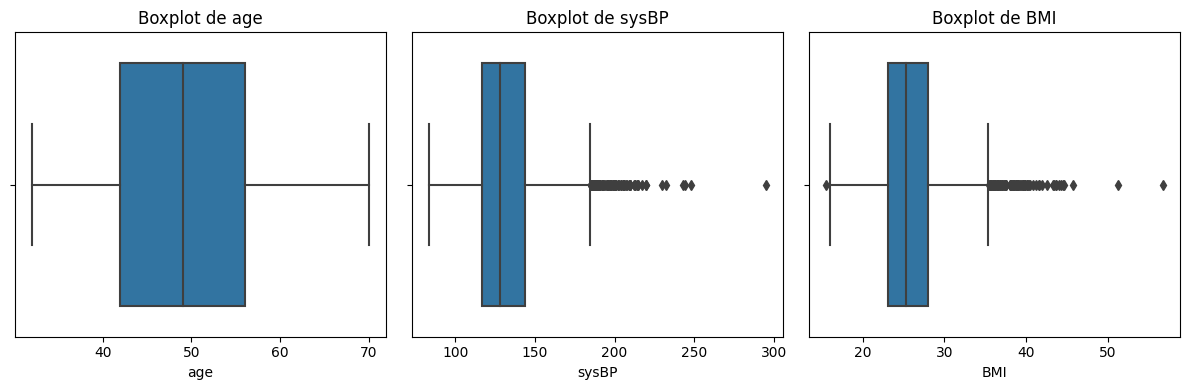

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Crear boxplots para cada variable en su respectivo subplot
for i, var in enumerate(columnas):
    sns.boxplot(x=df[var], ax=axes[i])
    axes[i].set_title(f'Boxplot de {var}')

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar los boxplots
plt.show()



Se puede observar que los datos tienen escalas diferentes lo que dificulta la comparación de las dispersiones. Destaca el índice de masa corporal, que muestra baja dispersión salvo los valores atípicos. Algo similar ocurre con "age", que se encuentra levemente concentrada hacia los valores menores pero con cuartiles bastante equilibrados.

3.  Elimina los datos atípicos del dataset. Para las siguientes preguntas, considera el dataset "limpio"

Aquí debemos distinguir los datos que, siendo numéricos, en realidad corresponden a clasificaciones, por lo que no corresponde analizar datos atípicos.

In [85]:
variables=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate', 'glucose']

valores_atipicos = True

# Bucle para eliminar valores atípicos iterativamente hasta que no queden en ninguna columna
while valores_atipicos:
    valores_atipicos = False  # Suponemos que no hay valores atípicos al principio

    for columna in variables:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1

        # Definir los límites para detectar valores atípicos
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Filtrar las filas con valores atípicos en la columna actual
        filas_atipicas = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]

        if not filas_atipicas.empty:
            # Si se encontraron valores atípicos en la columna, eliminarlos del DataFrame original
            df = df[~((df[columna] < limite_inferior) | (df[columna] > limite_superior))]

            # Cambiar la bandera a True para continuar el bucle
            valores_atipicos = True

print(df)



     sex  age  education currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0      M   39        4.0            No         0.0     0.0                0   
1      F   46        2.0            No         0.0     0.0                0   
2      M   48        1.0           Yes        20.0     0.0                0   
3      F   61        3.0           Yes        30.0     0.0                0   
4      F   46        3.0           Yes        23.0     0.0                0   
...   ..  ...        ...           ...         ...     ...              ...   
4227   M   43        4.0           Yes        20.0     0.0                0   
4231   M   58        3.0            No         0.0     0.0                0   
4232   M   68        1.0            No         0.0     0.0                0   
4234   M   51        3.0           Yes        43.0     0.0                0   
4237   F   52        2.0            No         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP

4. ¿Qué variables cuantitativas presentan mayor correlación? Explica.


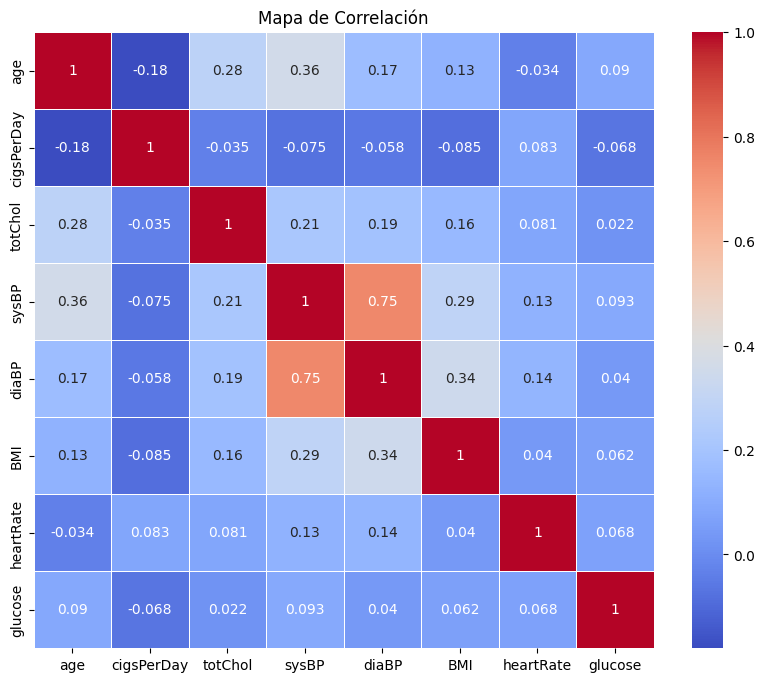

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación entre las columnas seleccionadas
matriz_correlacion = df[variables].corr()

# Configura el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crea el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', linewidths=.5)

# Añade título al mapa de calor
plt.title('Mapa de Correlación')

# Muestra el mapa de calor
plt.show()


Las únicas variables que presentan una correlación significativa son sysBP y diaBP.

5. Si de este dataset se escoge un paciente al azar, ¿cuál es la probabilidad de que sea hombre, si se sabe que pertenece al mayor cuartil de la variable correspondiente al índice de masa corporal?


In [87]:
cuart=df['BMI'].quantile(.75) #calculamos el valor del cuartil
sobre = len((df['BMI'] >= cuart)) #calculamos la cantidad de valores mayores o iguales que el p75
ambas = len(df[(df['sex'] == 'M') & (df['BMI'] >= cuart)]) #caluclamos la cantidad de valores sobre el p75, que además son hombres
probabilidad=round(ambas/sobre,2)
print(f'La probabilidad es {probabilidad}')

La probabilidad es 0.14


6. ¿Es razonable afirmar que, para una persona cualquiera (no necesariamente dentro del dataset), su ritmo cardiaco promedio es 75? Explica y justifica.

Se trata de realizar una prueba de hipótesis. Para ello, definiremos una confiabilidad del 95% (es decir, un valor de $\alpha$ igual a 0.05)


In [88]:
import pandas as pd
from scipy import stats
alpha=0.05

# Extraemos la columna "heartRate"
heartRate = df['heartRate']

# Realizamos la prueba t de Student univariada
t_statistic, p_value = stats.ttest_1samp(heartRate, 75)

# Comparamos el valor p con el nivel de significancia alpha
if p_value < alpha:
    print("Rechazar H0: Hay evidencia significativa de que el promedio de heartRate es diferente de 75")
else:
    print("No se puede rechazar H0: No hay evidencia significativa de que el promedio de heartRate sea diferente de 75.")


Rechazar H0: Hay evidencia significativa de que el promedio de heartRate es diferente de 75


7. Ser hombre, ¿influye en el promedio de cigarrillos consumidos por día, dentro de los pacientes fumadores? Explica.

Se trata quí de una prueba de hipótesis de muestras independientes, por lo que plantearemos así el problema con el mismo $\alpha$ anterior.


In [89]:
hombres = df[df['sex'] == 'M']['cigsPerDay']
mujeres = df[df['sex'] == 'F']['cigsPerDay']

# Realiza la prueba t de dos muestras para comparar las medias
t_statistic, p_value = stats.ttest_ind(hombres, mujeres, equal_var=False)

if p_value < alpha:
    print("Rechazar H0: Hay evidencia significativa de que hay una diferencia en la cantidad promedio de cigarrillos fumados por día entre los grupos masculino y femenino.")
else:
    print("No se puede rechazar H0: No hay evidencia significativa de que haya una diferencia en la cantidad promedio de cigarrillos fumados por día entre los grupos masculino y femenino.")


Rechazar H0: Hay evidencia significativa de que hay una diferencia en la cantidad promedio de cigarrillos fumados por día entre los grupos masculino y femenino.


8. Construye un modelo de regresión lineal que permita relacionar 6 variables del dataset con el índice de masa corporal. (Debes incluir al menos dos variables cualitativas). Evalúa tu modelo y explica.


In [90]:
#codificamos las variables cualitativas que aun no lo están
df = pd.get_dummies(df, columns=['sex', 'currentSmoker'], drop_first=True)
df.rename(columns={'sex_M': 'sex','currentSmoker_Yes':'currentSmoker'}, inplace=True)

age  education  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   39        4.0         0.0     0.0                0             0   
1   46        2.0         0.0     0.0                0             0   
2   48        1.0        20.0     0.0                0             0   
3   61        3.0        30.0     0.0                0             1   
4   46        3.0        23.0     0.0                0             0   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  \
0         0    195.0  106.0   70.0  26.97       80.0     77.0           0   
1         0    250.0  121.0   81.0  28.73       95.0     76.0           0   
2         0    245.0  127.5   80.0  25.34       75.0     70.0           0   
3         0    225.0  150.0   95.0  28.58       65.0    103.0           1   
4         0    285.0  130.0   84.0  23.10       85.0     85.0           0   

   sex  currentSmoker  
0    1              0  
1    0              0  
2    1              1  
3    0              1  
4    0              1

In [91]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definir las variables predictoras (X) y la variable dependiente (y)
X = df[['age', 'sex', 'currentSmoker', 'cigsPerDay', 'diabetes', 'totChol']]
y = df['BMI']

# Ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Realizar predicciones en el conjunto de datos
y_pred = modelo.predict(X)

# Calcular las métricas de evaluación
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 10.323966714390432
Mean Absolute Error (MAE): 2.5625554387176344
R-squared (R2): 0.09097588683658087


Estos valores pueden cambiar al realizar las diferentes pruebas, pero no deberían tener una variación demasiado grande que modifique la interpretación

* El MSE es 10.9083, lo que significa que, en promedio, los errores al cuadrado entre las predicciones y los valores reales son relativamente altos.
* El MAE es 2.666, lo que significa que, en promedio, los errores en valor absoluto entre las predicciones y los valores reales son relativamente bajos (hay que considerar los valores entre los que se encuentra el índice de masa corporal, para verificar que se trata de un valor relativamente bajo).
* El R2 es 0.0374, lo que indica que el modelo explica una cantidad muy pequeña de la variabilidad en los datos. Esto sugiere que el modelo de regresión tiene un rendimiento deficiente o que no se ajusta bien a los datos.

En resumen, basándose en estos valores, el modelo de regresión parece tener dificultades para ajustarse a los datos y hacer predicciones precisas.

9. Construye un modelo de regresión logística para predecir el riesgo de sufrir una enfermedad coronaria en los próximos diez años, a partir de las variables descritas. Verifica el balanceo de datos y evalúa tu modelo.

Primero, verificaremos si hay desbalanceo para ver si es preciso aplicar SMOTE o no

In [93]:
print(df['TenYearCHD'].value_counts())

0    2589
1     381
Name: TenYearCHD, dtype: int64


Se ve que hay un evidente desbalanceo, por lo que habrá que aplicarlo.


In [94]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score
from imblearn.over_sampling import SMOTE

X = df.drop(columns=["TenYearCHD"]).values

# Variable dependiente
y = df["TenYearCHD"].values

# Estandarizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Modelo de Regresión Logística con SMOTE
logistic_regression_model_smote = LogisticRegression(random_state=42)
logistic_regression_model_smote.fit(X_resampled, y_resampled)

# Realizar predicciones en el conjunto de datos con SMOTE
y_pred_smote = logistic_regression_model_smote.predict(X)

roc_auc = roc_auc_score(y, y_pred_smote)

average_precision = average_precision_score(y, y_pred_smote)

# Imprimir AUC-ROC y AUC-PR
print("AUC-ROC:", roc_auc)
print("AUC-PR:", average_precision)

AUC-ROC: 0.6747733445254454
AUC-PR: 0.1991255710576029


El valor de AUC-ROC de 0.6673 indica una capacidad de discriminación mejor que el azar, aunque es poco preciso ya que no está muy por sobre 0.5. El valor de AUC-PR de 0.1942 sugiere un rendimiento limitado en términos de precisión y recall.

Podemos concluir que no se puede elaborar un modelo muy preciso.

10. Separa los modelos de regresión anteriores en dos distintos, respectivamente, considerando alguna variable categórica. Compara y concluye.

Primero, vamos a separar nuestro modelo de regresión lineal, considerando por separado a fumadores y no fumadores

In [97]:
df_smoker_si = df[df['currentSmoker'] == 1]
df_smoker_no = df[df['currentSmoker'] == 0]

# Definir las variables predictoras (X) y la variable dependiente (y) para fumadores ('Yes')
X_smoker_si = df_smoker_si[['age', 'sex', 'cigsPerDay', 'diabetes', 'totChol']]
y_smoker_si = df_smoker_si['BMI']

# Definir las variables predictoras (X) y la variable dependiente (y) para no fumadores ('No')
X_smoker_no = df_smoker_no[['age', 'sex', 'cigsPerDay', 'diabetes', 'totChol']]
y_smoker_no = df_smoker_no['BMI']

# Ajustar el modelo de regresión lineal para fumadores
modelo_smoker_si = LinearRegression()
modelo_smoker_si.fit(X_smoker_si, y_smoker_si)

# Ajustar el modelo de regresión lineal para no fumadores
modelo_smoker_no = LinearRegression()
modelo_smoker_no.fit(X_smoker_no, y_smoker_no)

# Realizar predicciones para fumadores
y_pred_smoker_si = modelo_smoker_si.predict(X_smoker_si)

# Realizar predicciones para no fumadores
y_pred_smoker_no = modelo_smoker_no.predict(X_smoker_no)

# Calcular las métricas de evaluación para fumadores
mse_smoker_si = mean_squared_error(y_smoker_si, y_pred_smoker_si)
mae_smoker_si = mean_absolute_error(y_smoker_si, y_pred_smoker_si)
r2_smoker_si = r2_score(y_smoker_si, y_pred_smoker_si)

# Calcular las métricas de evaluación para no fumadores
mse_smoker_no = mean_squared_error(y_smoker_no, y_pred_smoker_no)
mae_smoker_no = mean_absolute_error(y_smoker_no, y_pred_smoker_no)
r2_smoker_no = r2_score(y_smoker_no, y_pred_smoker_no)

print("Métricas para fumadores ('Yes'):")
print(f"Mean Squared Error (MSE): {mse_smoker_si}")
print(f"Mean Absolute Error (MAE): {mae_smoker_si}")
print(f"R-squared (R2): {r2_smoker_si}")

print("\nMétricas para no fumadores ('No'):")
print(f"Mean Squared Error (MSE): {mse_smoker_no}")
print(f"Mean Absolute Error (MAE): {mae_smoker_no}")
print(f"R-squared (R2): {r2_smoker_no}")


Métricas para fumadores ('Yes'):
Mean Squared Error (MSE): 9.941188733691103
Mean Absolute Error (MAE): 2.4931073785675437
R-squared (R2): 0.08592375564235288

Métricas para no fumadores ('No'):
Mean Squared Error (MSE): 10.676531475480763
Mean Absolute Error (MAE): 2.6301676446090965
R-squared (R2): 0.048577559397344316


Podemos observar que los modelos presentan métricas muy similares, que a la vez son bastante semejantes a las anteriormente obtenidoas. No se observa, así, una diferencia sustancial al separar los dos conjuntos o no hacerlo.

Analizaremos ahora el modelo de regresión logística, separando entreb hombres y mujeres.

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score
from imblearn.over_sampling import SMOTE

# Supongamos que ya tienes X_resampled, y_resampled, y el DataFrame df

# Divide el DataFrame en dos subconjuntos: uno para hombres (sex=1) y otro para mujeres (sex=0)
df_hombres = df[df['sex'] == 1]
df_mujeres = df[df['sex'] == 0]

# Variables predictoras y variable dependiente para hombres
X_hombres = df_hombres.drop(columns=["TenYearCHD"]).values
y_hombres = df_hombres["TenYearCHD"].values

# Variables predictoras y variable dependiente para mujeres
X_mujeres = df_mujeres.drop(columns=["TenYearCHD"]).values
y_mujeres = df_mujeres["TenYearCHD"].values

# Estandarizar las características para ambos subconjuntos
scaler = StandardScaler()
X_hombres = scaler.fit_transform(X_hombres)
X_mujeres = scaler.transform(X_mujeres)

# Aplicar SMOTE por separado para hombres y mujeres
smote_hombres = SMOTE(random_state=42)
X_resampled_hombres, y_resampled_hombres = smote_hombres.fit_resample(X_hombres, y_hombres)

smote_mujeres = SMOTE(random_state=42)
X_resampled_mujeres, y_resampled_mujeres = smote_mujeres.fit_resample(X_mujeres, y_mujeres)

# Modelo de Regresión Logística con SMOTE para hombres
logistic_regression_model_hombres = LogisticRegression(random_state=42)
logistic_regression_model_hombres.fit(X_resampled_hombres, y_resampled_hombres)

# Modelo de Regresión Logística con SMOTE para mujeres
logistic_regression_model_mujeres = LogisticRegression(random_state=42)
logistic_regression_model_mujeres.fit(X_resampled_mujeres, y_resampled_mujeres)

# Realizar predicciones en los conjuntos de datos con SMOTE para hombres y mujeres
y_pred_hombres = logistic_regression_model_hombres.predict(X_hombres)
y_pred_mujeres = logistic_regression_model_mujeres.predict(X_mujeres)

# Calcular las métricas de evaluación para hombres y mujeres por separado
roc_auc_hombres = roc_auc_score(y_hombres, y_pred_hombres)
average_precision_hombres = average_precision_score(y_hombres, y_pred_hombres)

roc_auc_mujeres = roc_auc_score(y_mujeres, y_pred_mujeres)
average_precision_mujeres = average_precision_score(y_mujeres, y_pred_mujeres)

# Imprimir AUC-ROC y AUC-PR por separado para hombres y mujeres
print("Métricas para hombres:")
print("AUC-ROC:", roc_auc_hombres)
print("AUC-PR:", average_precision_hombres)

print("\nMétricas para mujeres:")
print("AUC-ROC:", roc_auc_mujeres)
print("AUC-PR:", average_precision_mujeres)


Métricas para hombres:
AUC-ROC: 0.6605162542455119
AUC-PR: 0.24631414515710676

Métricas para mujeres:
AUC-ROC: 0.6675294794362956
AUC-PR: 0.14753059404086127


Se observa, nuevamente, que los modelos son bastante similares al inicial, aunque el AUC-PR mejora levemente para hombres pero baja en algo para las mujeres. No se puede concluir que efectivamente sea tanto mejor separar los modelos.